<a href="https://colab.research.google.com/github/Sbilalahmad/AI_ML_mentorship/blob/main/notebooks/DLP/Image_classifier_with_ANN_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [4]:
(X_train, Y_train),(X_test,Y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
X_train.shape,Y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


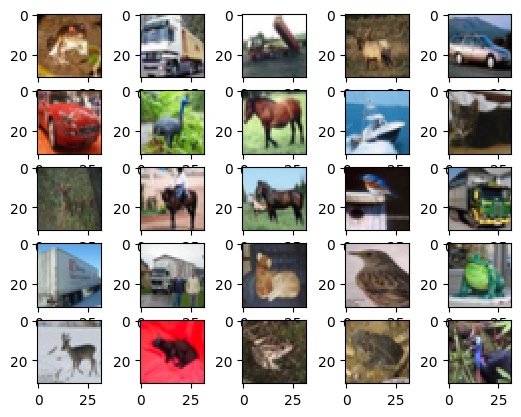

In [7]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])

In [8]:
classes=['airplane'
,	'automobile'
,	'bird'
,	'cat'
,	'deer'
,	'dog'
,	'frog'
,	'horse'
,	'ship'
,	'truck']

In [9]:
classes[Y_test[1][0]]

'ship'

In [10]:
X_train_scalled=X_train/255
X_test_scalled=X_test/255

In [11]:
Y_train_catagorical=keras.utils.to_categorical(Y_train,num_classes=10)
Y_test_catagorical=keras.utils.to_categorical(Y_test,num_classes=10)


# Artificial Neural Network (ANN)

In [12]:
ann=keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(1000,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ]
)
ann.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
ann.fit(X_train_scalled,Y_train_catagorical,epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3108 - loss: 1.9289
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4219 - loss: 1.6455
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4481 - loss: 1.5579
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4769 - loss: 1.4882
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4943 - loss: 1.4335
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5090 - loss: 1.3887
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5224 - loss: 1.3612
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5387 - loss: 1.3139
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5459 - loss: 1.2878
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5554 - loss: 1.2558


In [13]:
cnn=keras.Sequential(
    [
        #CNN layers
        keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        keras.layers.MaxPooling2D(2,2),

        #Dense Layers
        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ]
)
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
Y_pred=np.argmax(ann.predict(X_test_scalled)[555])
classes[Y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'ship'

In [ ]:
ann.evaluate(X_test_scalled,Y_test_catagorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4951 - loss: 1.4229


[1.4329712390899658, 0.48539999127388]

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
def get_model(Choice:str):
  if Choice=='ANN':
    model=keras.Sequential(
        [
              keras.layers.Flatten(input_shape=(32,32,3)),
              keras.layers.Dense(3000,activation='relu'),
              keras.layers.Dense(1000,activation='relu'),
              keras.layers.Dense(10,activation='softmax')

        ]

    )
    model.compile(
      optimizer='SGD',
      loss='categorical_crossentropy',
      metrics=['accuracy']
    )
  elif Choice=='CNN':
    model=keras.Sequential(
        [
            #CNN layers
            keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
            keras.layers.MaxPooling2D(2,2),
            keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
            keras.layers.MaxPooling2D(2,2),

            #Dense Layers
            keras.layers.Flatten(),
            keras.layers.Dense(64,activation='relu'),
            keras.layers.Dense(10,activation='softmax')
        ]
    )
    cnn.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
  else:
    print('Invalid Choice')
  return model


In [ ]:
%%timeit -n1 -r1
with tf.device('CPU:0'):
  cpu_model= get_model('ANN')
  cpu_model.fit(X_train_scalled,Y_train_catagorical,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 0.3018 - loss: 1.9319
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device('GPU:0'):
  gpu_model= get_model()
  gpu_model.fit(X_train_scalled,Y_train_catagorical,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3031 - loss: 1.9310
8.63 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [15]:
cnn.fit(X_train_scalled,Y_train_catagorical,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3730 - loss: 1.7235
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5857 - loss: 1.1792
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6435 - loss: 1.0197
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6758 - loss: 0.9278
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7047 - loss: 0.8498
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7229 - loss: 0.7985
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7392 - loss: 0.7503
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7574 - loss: 0.7000
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7683 - loss: 0.6656
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7811 - loss: 0.6275


In [17]:
yp=cnn.predict(X_test_scalled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
cnn.evaluate(X_test_scalled,Y_test_catagorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7015 - loss: 0.9188


[0.920734167098999, 0.6983000040054321]

In [25]:
Yprd=np.argmax(yp,axis=1)
Yprd

array([3, 8, 8, ..., 5, 4, 7])

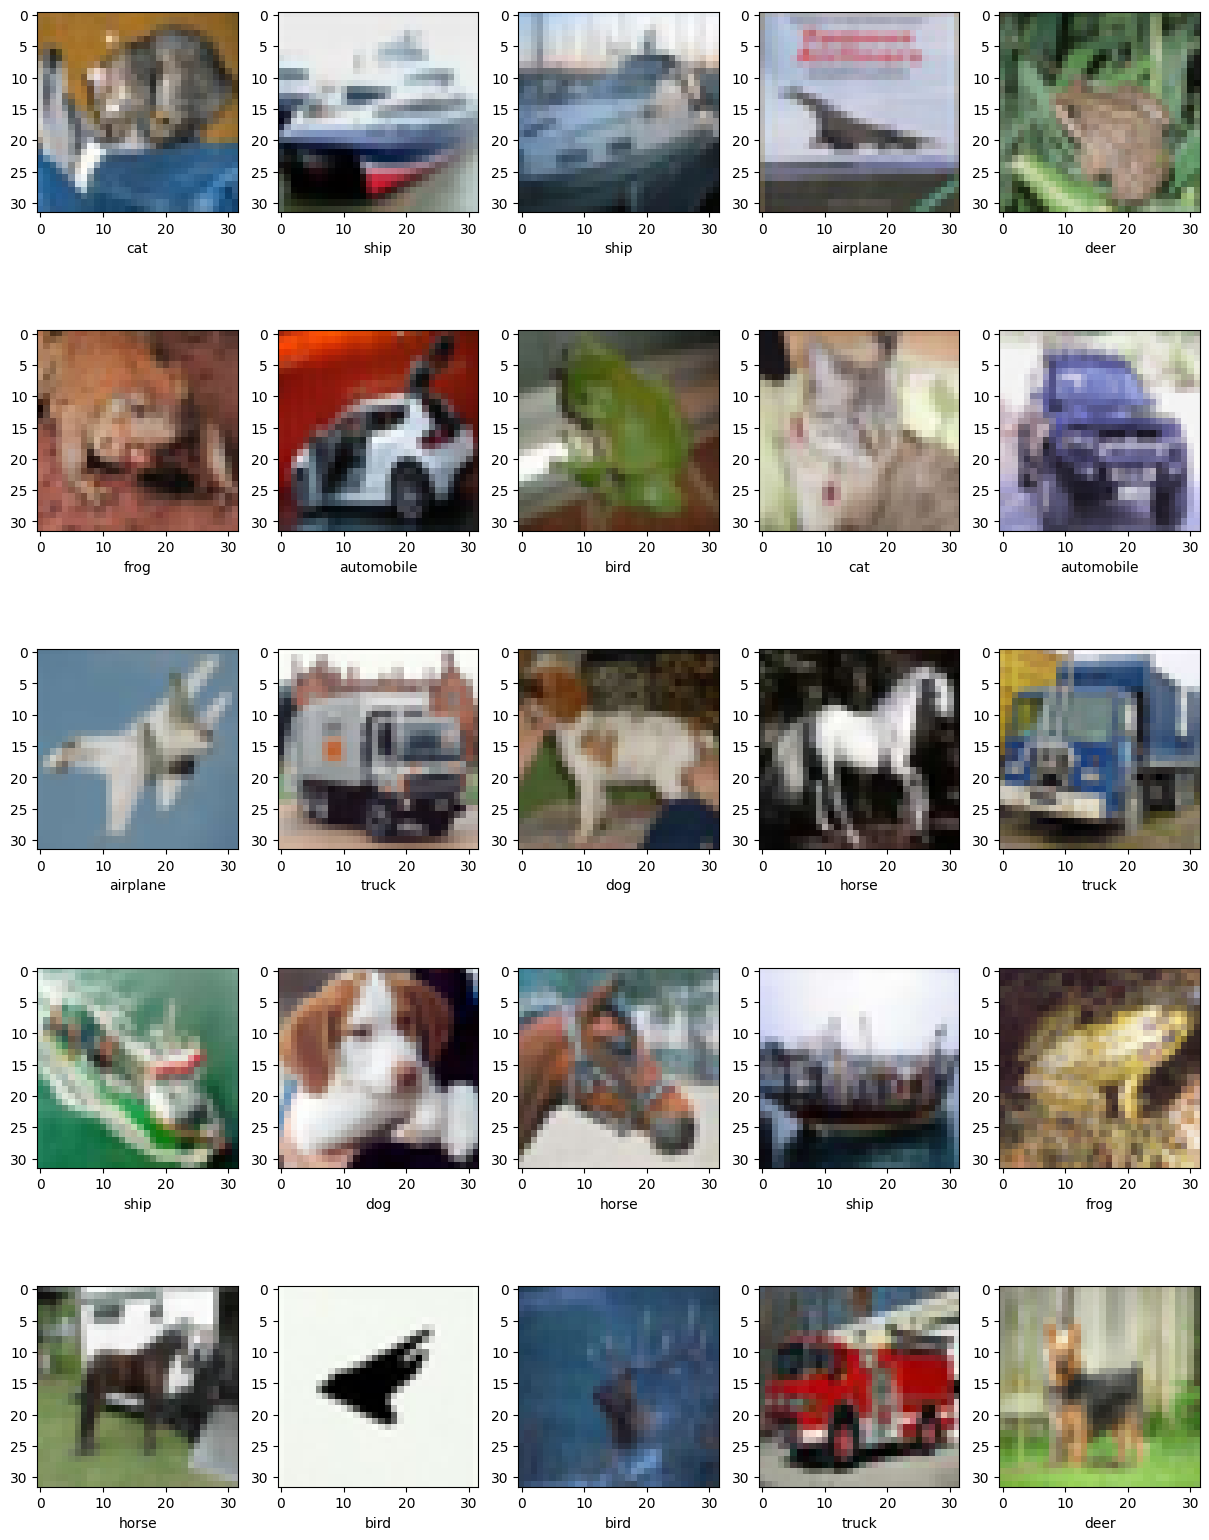

In [28]:
from os import name
plt.figure(figsize=(15,20))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i])
  plt.xlabel(classes[Yprd[i]])
#